# Problem: Reflection unitaries

In the previous two problems, the output of a classical Boolean function is computed into an additional qubit. However, quantum computers can also compute Boolean functions into the phase of a quantum state, which we explore in this problem.

Suppose $f:\{0,1\}^n\rightarrow\{0,1\}$ is a Boolean function. For $\beta \in R$, define an $\textit{n}$-qubit unitary

$$
\large
\begin{equation*}
    U_f(\beta) = \sum_{x\in\{0,1\}^n} e^{i\beta f(x)}|x\rangle \langle x|
\tag{1}
\end{equation*}
$$
When $U_f$ is applied to computational basis state $|x\rangle$ it adds a phase $e^{i\beta}$ if $f(x) = 1$ and does  nothing otherwise.<br>
Your goal in this problem is to implement $U_f$ for a variety of functions with $\textit{n}$= 3
<h3>
\begin{align}
f_0(x_1x_2x_3)&=0,\quad f_1(x_1x_2x_3)=x_1x_2x_3,\quad f_2(x_1x_2x_3)=x_1x_2x_3+(1-x_1)(1-x_2)(1-x_3),\\\nonumber
f_3(x_1x_2x_3)&=x_1+x_2+x_3+x_1x_2x_3,\quad f_4(x_1x_2x_3)=x_1+x_2+x_3.
\tag{2}
\end{align}
</h3>
Here, $f_m$ has m solutions to f(x) = 1. For instance,$f_2$ evaluates to 1 on the inputs x = 000 and x = 111.You may use $A \geq 0$ ancilla qubits in your implementation initialized in $∣0^A\rangle$ as long as they are returned to $∣0^A\rangle$ by the end of the computation. Two examples are shown in Fig.2 for n= 2 functions.

![icpc_reflections.png](icpc_reflections.png "ShowMyImage")

The "reflection unitaries" $U_f(\beta)$ are useful in some quantum algorithms. In particular, the famous Grover search algorithm uses these reflections to outperform classical search algorithms for unstructured lists.

<h1>
    $f_m$ for m = 0

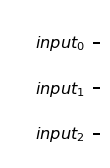

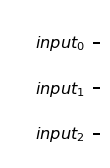

In [184]:
# Importing the qiskit module
from qiskit import *
import numpy as np

q0 =  3  # number of required qubits
a0 =  0  # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_0(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below ######### 
    a, b, c = Q[0], Q[1], Q[2]
    qc = Circ
#     qc.cp(beta, a, b)
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    
    return Circ

qc_3a = Circuit_0(q0,a0,beta)

<h1>
    $f_m$ for m = 1

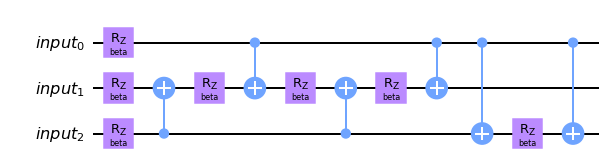

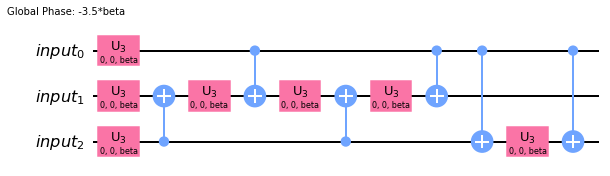

In [259]:
# Importing the qiskit module
from qiskit import *

q1 = 3  # number of required qubits
a1 = 0 # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_1(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    qc = Circ
    a = Q[0]
    b = Q[1]
    c = Q[2]
    
    qc.rz(beta, a)
    qc.rz(beta, b)
    qc.rz(beta, c)
    qc.cx(c, b)
    qc.rz(beta, b)
    qc.cx(a, b)
    qc.rz(beta, b)
    qc.cx(c, b)
    qc.rz(beta, b)
    qc.cx(a, b)
    qc.cx(a, c)
    qc.rz(beta, c)
    qc.cx(a, c)
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    
    return Circ

qc_3b = Circuit_1(q1,a1,beta)

<h1>
    $f_m$ for m = 2

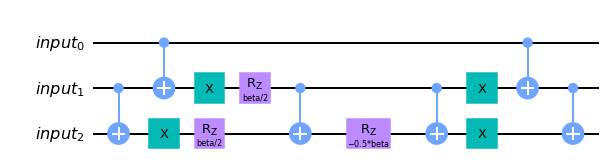

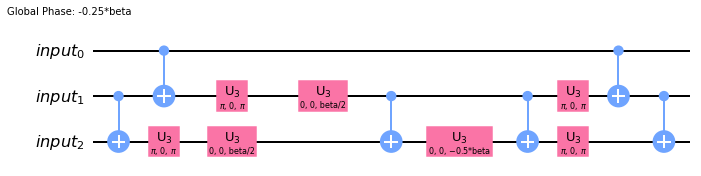

In [250]:
# Importing the qiskit module
from qiskit import *

q2 = 3  # number of required qubits
a2 = 0  # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

def rcccx(qc, a, b, c, d):
    qc.h(d)
    qc.t(d)
    qc.cx(c,d)
    qc.tdg(d)
    qc.h(d)
    qc.cx(a,d)
    qc.t(d)
    qc.cx(b,d)
    qc.tdg(d)
    qc.cx(a,d)
    qc.t(d)
    qc.cx(b,d)
    qc.tdg(d)
    qc.h(d)
    qc.t(d)    
    qc.cx(c,d)
    qc.tdg(d)
    qc.h(d)
    
def rcccx_dg(qc, a, b, c, d):
    qc.h(d)
    qc.tdg(d)
    qc.cx(c,d)
    qc.t(d)
    qc.h(d)
    qc.tdg(d)
    qc.cx(b,d)
    qc.t(d)
    qc.cx(a,d)
    qc.tdg(d)
    qc.cx(b,d)
    qc.t(d)
    qc.cx(a,d)
    qc.h(d)
    qc.tdg(d)
    qc.cx(c,d)
    qc.t(d)
    qc.h(d)

# Defining Quantum Circuit with the given circuits
def Circuit_2(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    
    
#     x_matrix = np.array([[0, 1], [1, 0]])
#     z_beta_matrix = np.array([[1, 0], [0, np.exp(1j*np.pi*beta/2)]])
#     xz = np.matmul(z_beta_matrix, x_matrix)
#     print(xz)
    
    qc = Circ
    a = Q[0]
    b = Q[1]
    c = Q[2]
    
    qc.cx(b,c)
    qc.cx(a,b)
#     qc.barrier()
    # 
    qc.x(b)
    qc.x(c)
#     qc.barrier()
    qc.rz(beta/2, b)
    qc.rz(beta/2, c)
    qc.cx(b,c)
    qc.rz(-beta/2, c)
    qc.cx(b,c)
    qc.x(c)
    qc.x(b)
    #
    qc.cx(a,b)
    qc.cx(b,c)
    
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    
    return Circ

qc_3c = Circuit_2(q2,a2,beta)

<h1>
    $f_m$ for m = 3

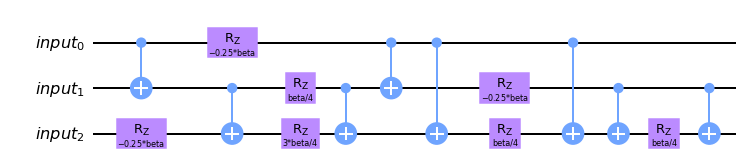

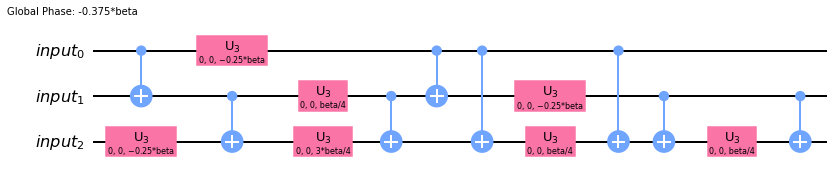

In [254]:
# Importing the qiskit module
from qiskit import *

q3 = 3  # number of required qubits
a3 = 0  # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_3(q,a,beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')  
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    qc = Circ
    a = Q[0]
    b = Q[1]
    c = Q[2]
    
    qc.cx(a, b)
    qc.rz(-beta/4, c) # a
    qc.rz(-beta/4, a) # c
    qc.cx(b, c)
    qc.rz(beta/4, b) # ab
    qc.rz(3*beta/4, c) # abc
    qc.cx(b, c)
    qc.cx(a, b)
    qc.cx(a, c)
    qc.rz(-beta/4, b) # b
    qc.rz(beta/4, c) # ac
    qc.cx(a, c)
    qc.cx(b, c)
    qc.rz(beta/4, c) # bc
    qc.cx(b, c)

    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    
    return Circ

qc_3d = Circuit_3(q3,a3,beta)

<h1>
    $f_m$ for m = 4

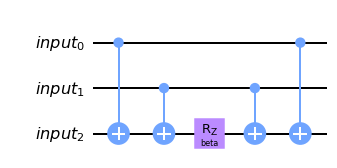

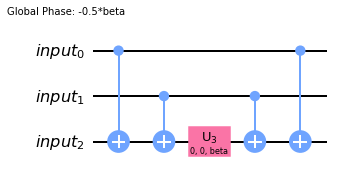

In [255]:
# Importing the qiskit module
from qiskit import *

q4 = 3  # number of required qubits
a4 = 0  # number of ancilla qubit
beta = circuit.Parameter('beta') #Parameter for reflection 

# Defining Quantum Circuit with the given circuits
def Circuit_4(q, a, beta):
    if a != 0:
        # initiating required and ancilla qubits
        Q = QuantumRegister(q, 'input') 
        A = QuantumRegister(a, 'ancilla')   
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q,A)
    else:
        # initiating required qubits
        Q = QuantumRegister(q, 'input') 
        
        # creating circuit with above qubits
        Circ = QuantumCircuit(Q)
    
    ##### Create you circuit below #########
    qc = Circ
    a = Q[0]
    b = Q[1]
    c = Q[2]
    qc.cx(a, c)
    qc.cx(b, c)
    qc.rz(beta, c)
    qc.cx(b, c)
    qc.cx(a, c)
    
    ########################################
    
    # Uncomment to draw quantum circuit
    display(Circ.draw('mpl'))
    
    # Transpiling the circuit into u, cnot
    Circ = transpile(Circ, basis_gates=['u3','cx'])
    
    # Uncomment to draw transpiled circuit
    display(Circ.draw('mpl'))
    
    return Circ

qc_3e = Circuit_4(q4,a4,beta)

### Grader

In [256]:
all_circuits = [qc_3a, qc_3b, qc_3c, qc_3d, qc_3e]

from qc_grader import grade_ex3

grade_ex3(all_circuits)

Checking for circuit 0 ...
Checking for circuit 1 ...
Checking for circuit 2 ...
Checking for circuit 3 ...
Checking for circuit 4 ...
Grading your answer for ex3. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 374.
Feel free to submit your answer.



# Circuit verification and Cost Metric

$\textbf{Costing metric:}$ For the $m^{th}$ circuit, let $G_m$ be the number of 2-qubit gates, $D_m$ the depth,  and $A_m$ the number of ancillas. Your solution quality will be judged on the following cost metric: 
$$\text{Cost} = \sum_{m=0}^4 10G_m + D_m(n+A_m)$$ .
The reasoning behind this metric relates to the error rates in quantum circuits. Notice that $D_m(n+A_m)$ is roughly the spacetime volume of the circuit (the collective number of timesteps qubits participating in thecircuit must be kept alive). Also, two-qubit gates are roughly (optimistically) 10 times as likely to fail as idling qubits. Thus, $Cost_n$ is roughly proportional to error rate of all of your circuits combined.

### Submission for evaluation 

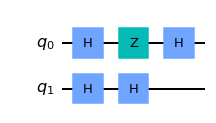

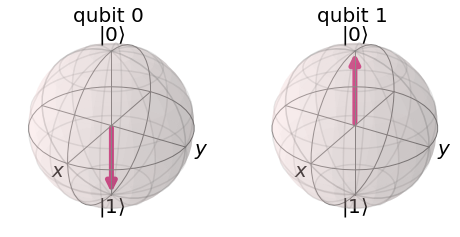

In [89]:
## Uncomment and run the following code to submit
# from qc_grader import submit_ex3

# submit_ex3(all_circuits)

from qiskit.visualization import plot_histogram, plot_bloch_multivector

qc = QuantumCircuit(2)
qc.h([0,1])
qc.z(0)
qc.h([0,1])
display(qc.draw('mpl'))

sv_sim = Aer.get_backend("statevector_simulator")
qobj = assemble(qc)
statevector = sv_sim.run(qobj).result().get_statevector()
plot_bloch_multivector(statevector)